In [13]:
import os
import glob

import cv2
import numpy as np
import torch
import random

import matplotlib.pyplot as plt

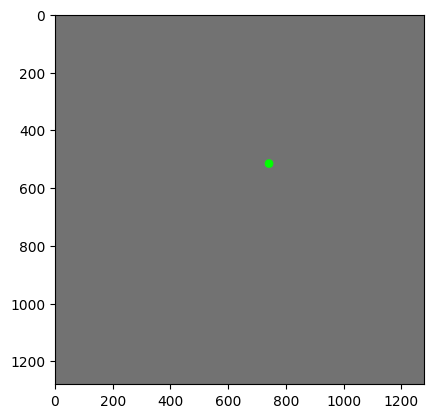

In [12]:
img_size= 640
mosaic_border = [- img_size //2, - img_size // 2]
s_mosaic = img_size * 2

mosaic = np.full((s_mosaic, s_mosaic, 3), 114, dtype=np.uint8)
yc, xc = (int(random.uniform(-x, s_mosaic + x)) for x in mosaic_border )

canvas = mosaic.copy()
cv2.circle(canvas, (xc, yc), radius=15, color=(0, 255, 0), thickness=-1)
plt.imshow(canvas)

In [14]:
from cspnext.datasets.coco import classes, colors

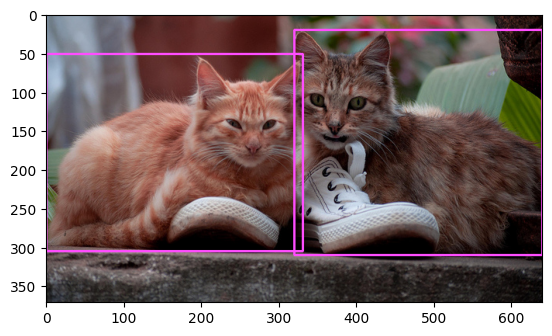

In [42]:
imp_lst = glob.glob('../assets/tiny_coco/images/*.jpg')
for _ in range(4):
    image_path = random.choice(imp_lst)
    image = cv2.imread(image_path)
    label_path = image_path.replace('images','labels').replace('.jpg', '.txt')
    labels = [list(map(eval, x.strip().split(' '))) for x in open(label_path, 'r').readlines()]
    height, width = image.shape[:2]
    for label in labels:
        cls_idx, xc, yc, w, h = label
        class_name = classes[cls_idx]
        color = colors[cls_idx]
        cv2.rectangle(
            image,
            (int( width * ( xc - w/2) ), int( height * ( yc - h/2))),
            (int( width* ( xc + w/2)), int( height * ( yc + h/2)) ),
            color=color,
            thickness=2
        )
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    break

In [68]:
def mosaic_gen(image_list, labels_list, scale=[640, 640]):
    # assert len(image_list) == 4
    mosaic_range = [scale[0] // 2, scale[1] // 2]
    mosaic_image = np.full((2*scale[1], 2*scale[0], 3), 114, dtype=np.uint8)
    xc, yc = [
        int(random.uniform(scale[0] - mosaic_range[0], scale[0] + mosaic_range[0])),
        int(random.uniform(scale[1] - mosaic_range[1], scale[1] + mosaic_range[1]))
    ]
    height, width = mosaic_image.shape[:2]
    # clockwise sequence
    for i, (image, labels) in enumerate(zip(image_list, labels_list)):
        h, w = image.shape[:2]
        if i == 0:
            x1a, y1a, x2a, y2a = max(0, xc - w), max(0, yc - h), xc, yc
            x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h
        elif i == 1:
            x1a, y1a, x2a, y2a = xc, max(0, yc - h), min(width, xc + w), yc
            x1b, y1b, x2b, y2b = 0, 0, x2a - x1a, y2a - y1a
        elif i == 2:
            x1a, y1a, x2a, y2a = xc, yc, min(width, xc + w), min(height, yc + h)
            x1b, y1b, x2b, y2b = 0, 0, x2a - x1a, y2a - y1a
        elif i == 3:
            x1a, y1a, x2a, y2a = max(xc - w, 0), yc, xc, min(height, yc + h)
            x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, w, y2a - y1a
        mosaic_image[x1a:x1a+1, y2a:y2a+1] = image[x1b:x1b+1, y2b:y2b+1]
    return mosaic_image
image_list = []
labels_list = []
for image_path in random.sample(imp_lst, k=4):
    image_list.append(cv2.imread(image_path))
    label_path = image_path.replace('images','labels').replace('.jpg', '.txt')
    labels = [list(map(eval, x.strip().split(' '))) for x in open(label_path, 'r').readlines()]
    labels_list.append(labels)
mosaic_image = mosaic_gen(image_list, labels_list, [640, 480])
mosaic_image = cv2.cvtColor(mosaic_image, cv2.COLOR_BGR2RGB)
plt.imshow(mosaic_image)


85 325 85 325
0 0 640 371
725 56 725 56
0 0 480 640


ValueError: could not broadcast input array from shape (1,0,3) into shape (1,1,3)